# Importation of librairies and data

In [2]:
# reload
%reload_ext autoreload
%autoreload 2

import pandas as pd
import random
import sys
sys.path.append('./')

from timeseries import TimeSeries

Generate data done


In [8]:
dftaux = pd.read_csv(filepath_or_buffer = './datas/exchange_rates_ecb_eur_updated_2023.csv',sep = '\t')
#dftaux.head()

Generate data done


# Initialisation of the multi timeseries

In [9]:
symbols = ['USD', 'JPY', 'GBP', 'CHF']

In [10]:
random.seed(14021999)
ts = TimeSeries(dftaux, symbols)
ts.pre_processing(method_return='arithmetic')

# Analysis of the timeseries

In [ ]:
ts.plot(type_plot='rates')

In [ ]:
ts.plot(type_plot='returns')

In [41]:
ts.statistics()

,USD,JPY,GBP,CHF
Skewness,-0.000462,-0.12958,0.09719,-0.082916
Kurtosis,3.203391,3.593763,3.29483,4.665462
Normality,False,False,False,False
Stationarity,True,True,True,True


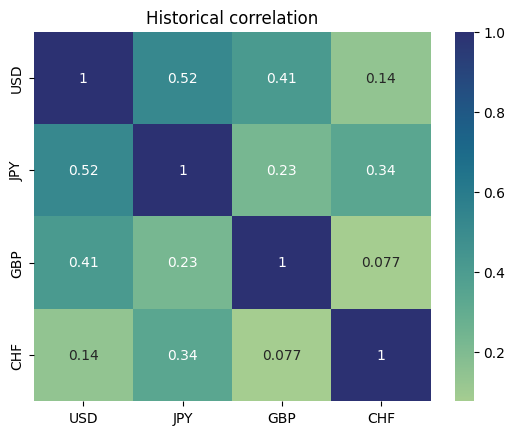

In [42]:
ts.correlation()

# Bootstrap method

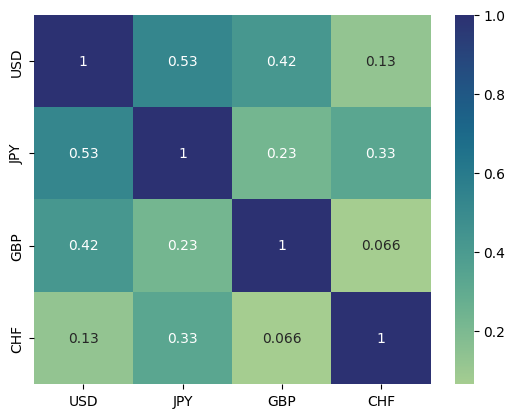

Correlation done
Quantiles done


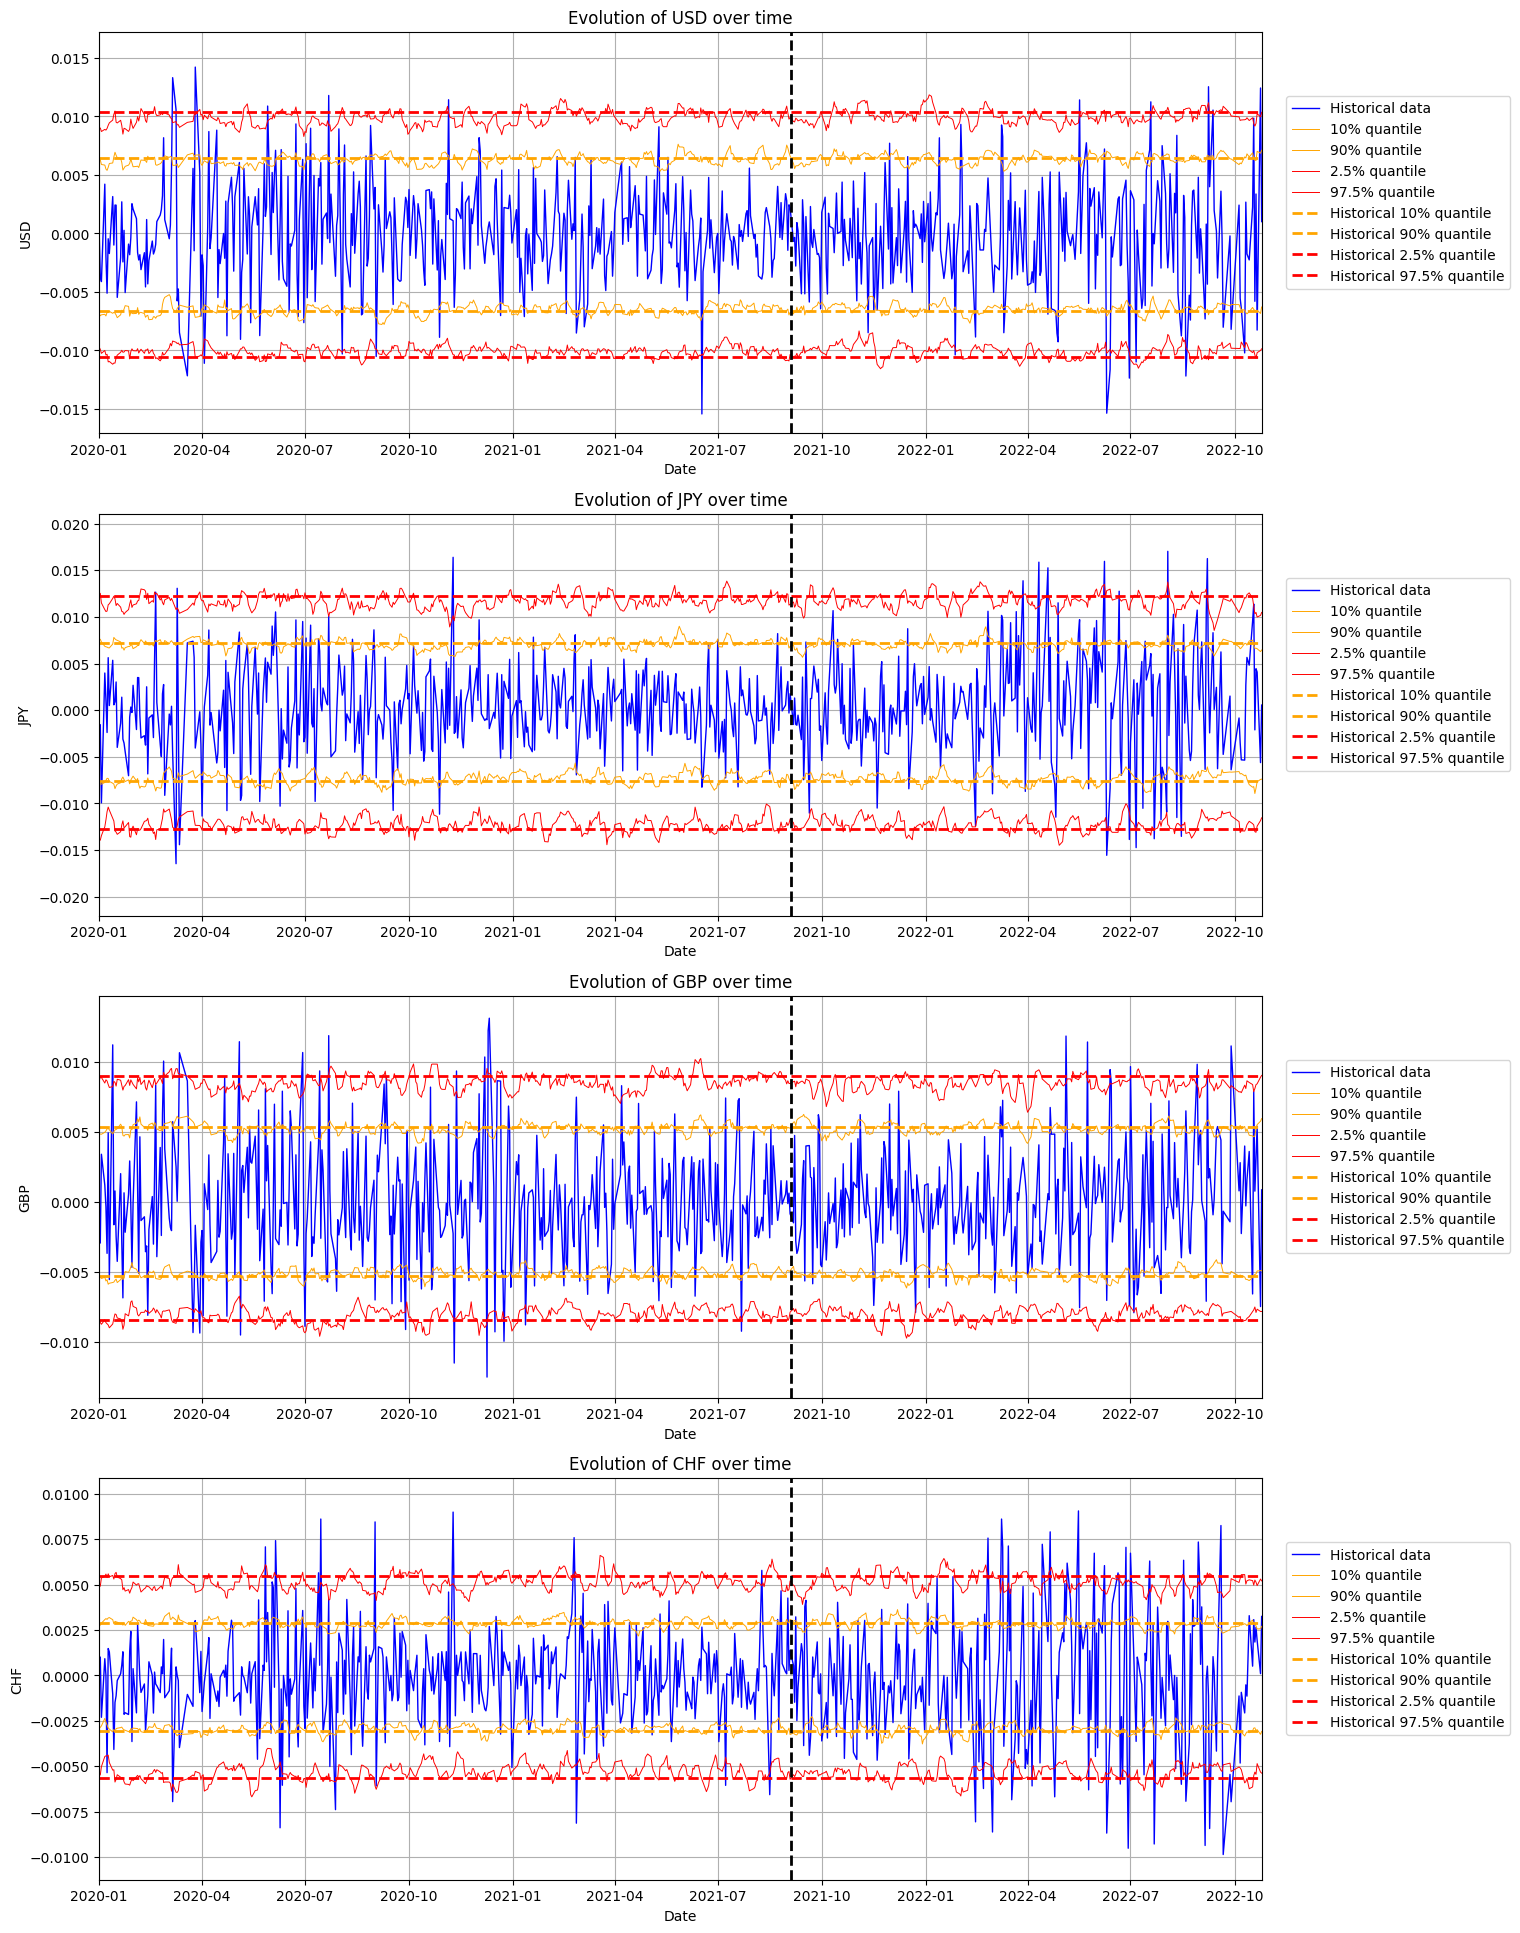

In [9]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 100
ts.bootstrap_esg(scenarios=scenarios, test_date=test_dates, plot_from=plot_from)

# RBM simple on a mix gaussian distribution

<AxesSubplot: ylabel='Count'>

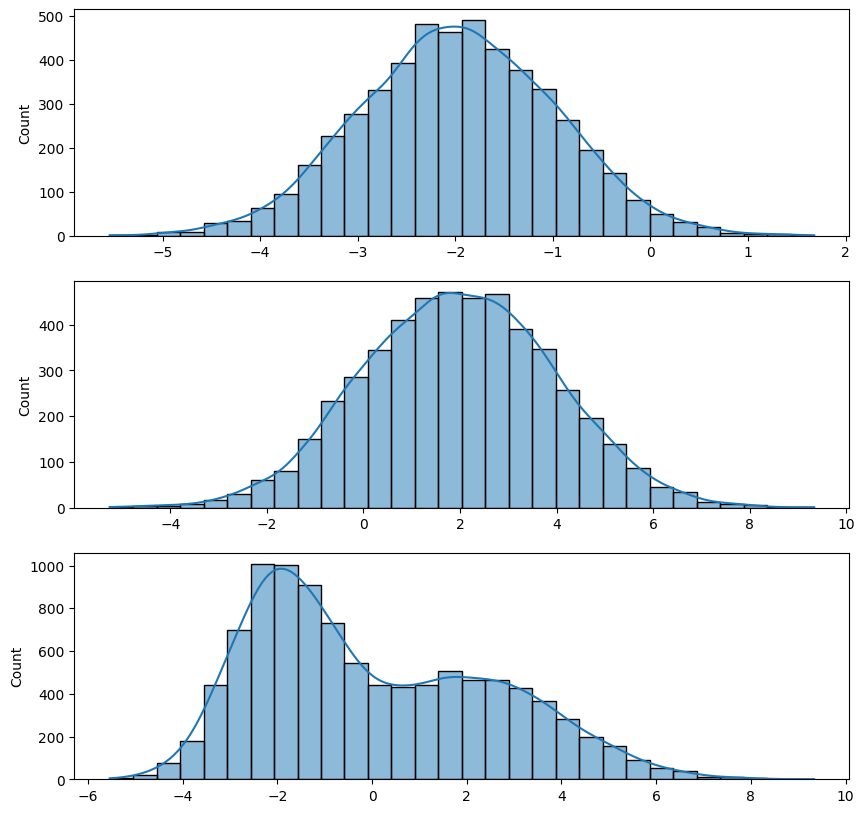

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

s1 = np.random.normal(loc=-2, scale=1, size=5000)
s2 = np.random.normal(loc=2, scale=2, size=5000)
st = np.concatenate((s1,s2))
np.random.shuffle(st)
np.random.shuffle(st)
np.random.shuffle(st)

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
sns.histplot(s1,bins=30,kde=True,ax=axes[0])
sns.histplot(s2,bins=30,kde=True,ax=axes[1])
sns.histplot(st,bins=30,kde=True,ax=axes[2])

min: -5.5426326358211, max: 9.338137665533026
mse: 1.729269161569519e-08


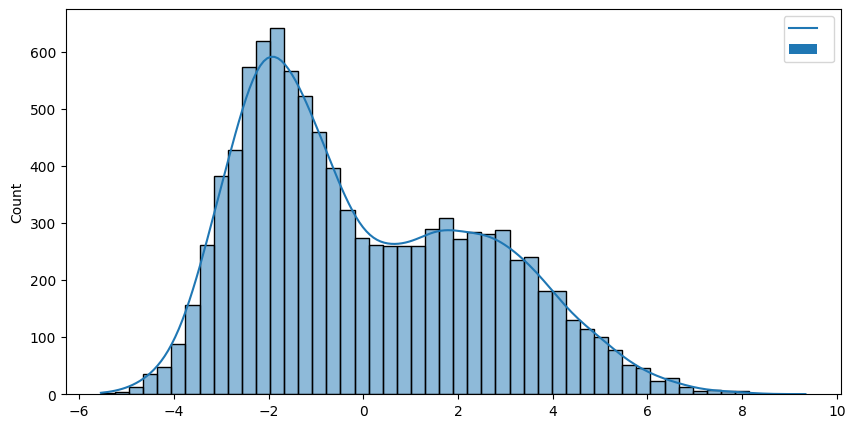

mse: 4.7927: 100%|██████████| 2000/2000 [00:05<00:00, 347.58it/s] 


Training time: 6.336853265762329s


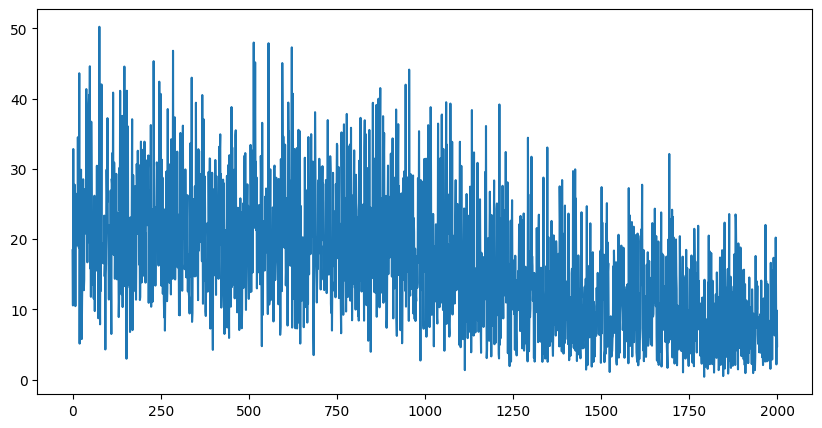

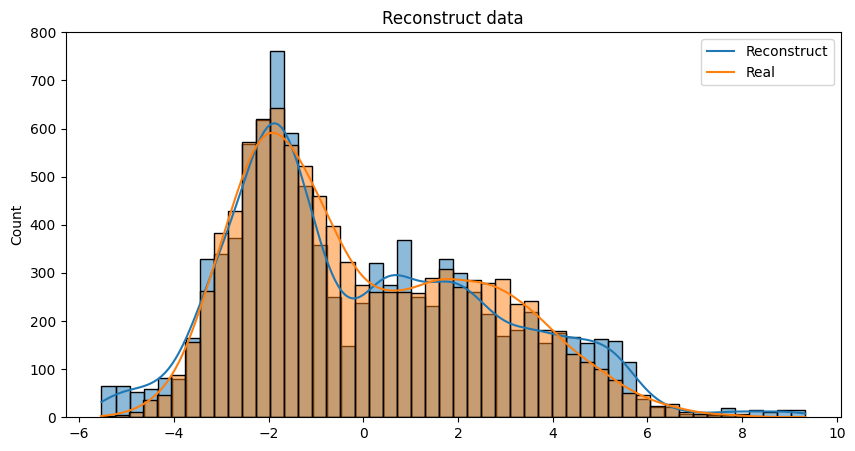

<Figure size 1000x500 with 0 Axes>

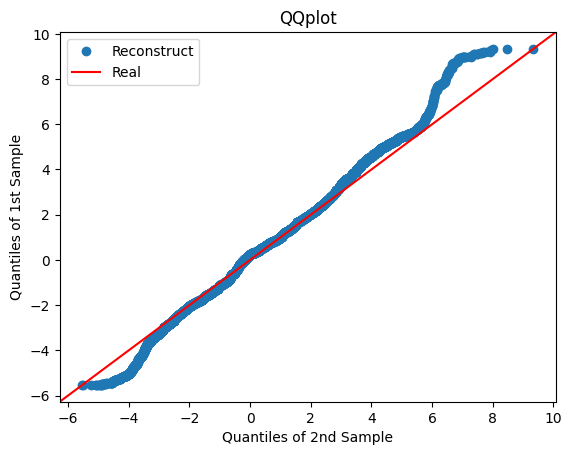

In [45]:
from rbm import RBM_simple
rbm = RBM_simple(st, 16, 12)
rbm.pre_processing()  
rbm.train(K=2000, batch_size=10, k_steps=1, lr=0.025, verbose=True)

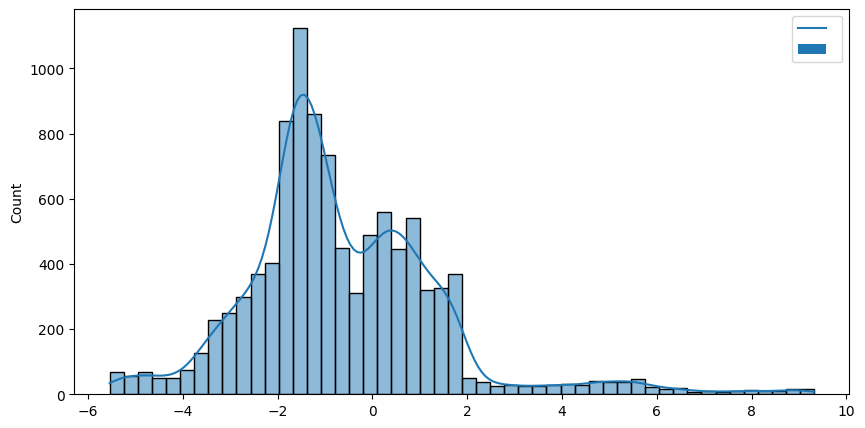

<Figure size 1000x500 with 0 Axes>

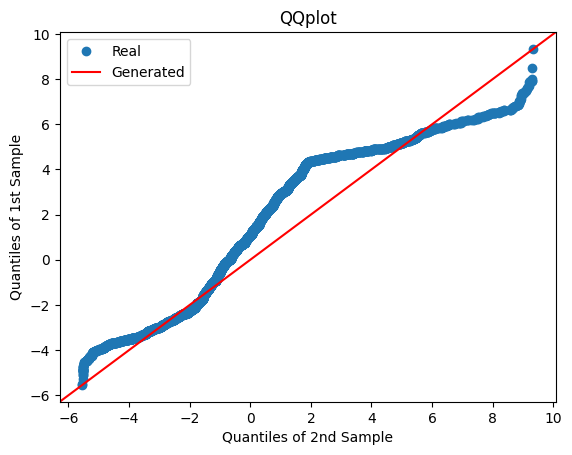

In [46]:
rbm.generate_data(10000, 0, 1)

# RBM method

Pre-processing done


100%|██████████| 7000/7000 [00:43<00:00, 162.67it/s]


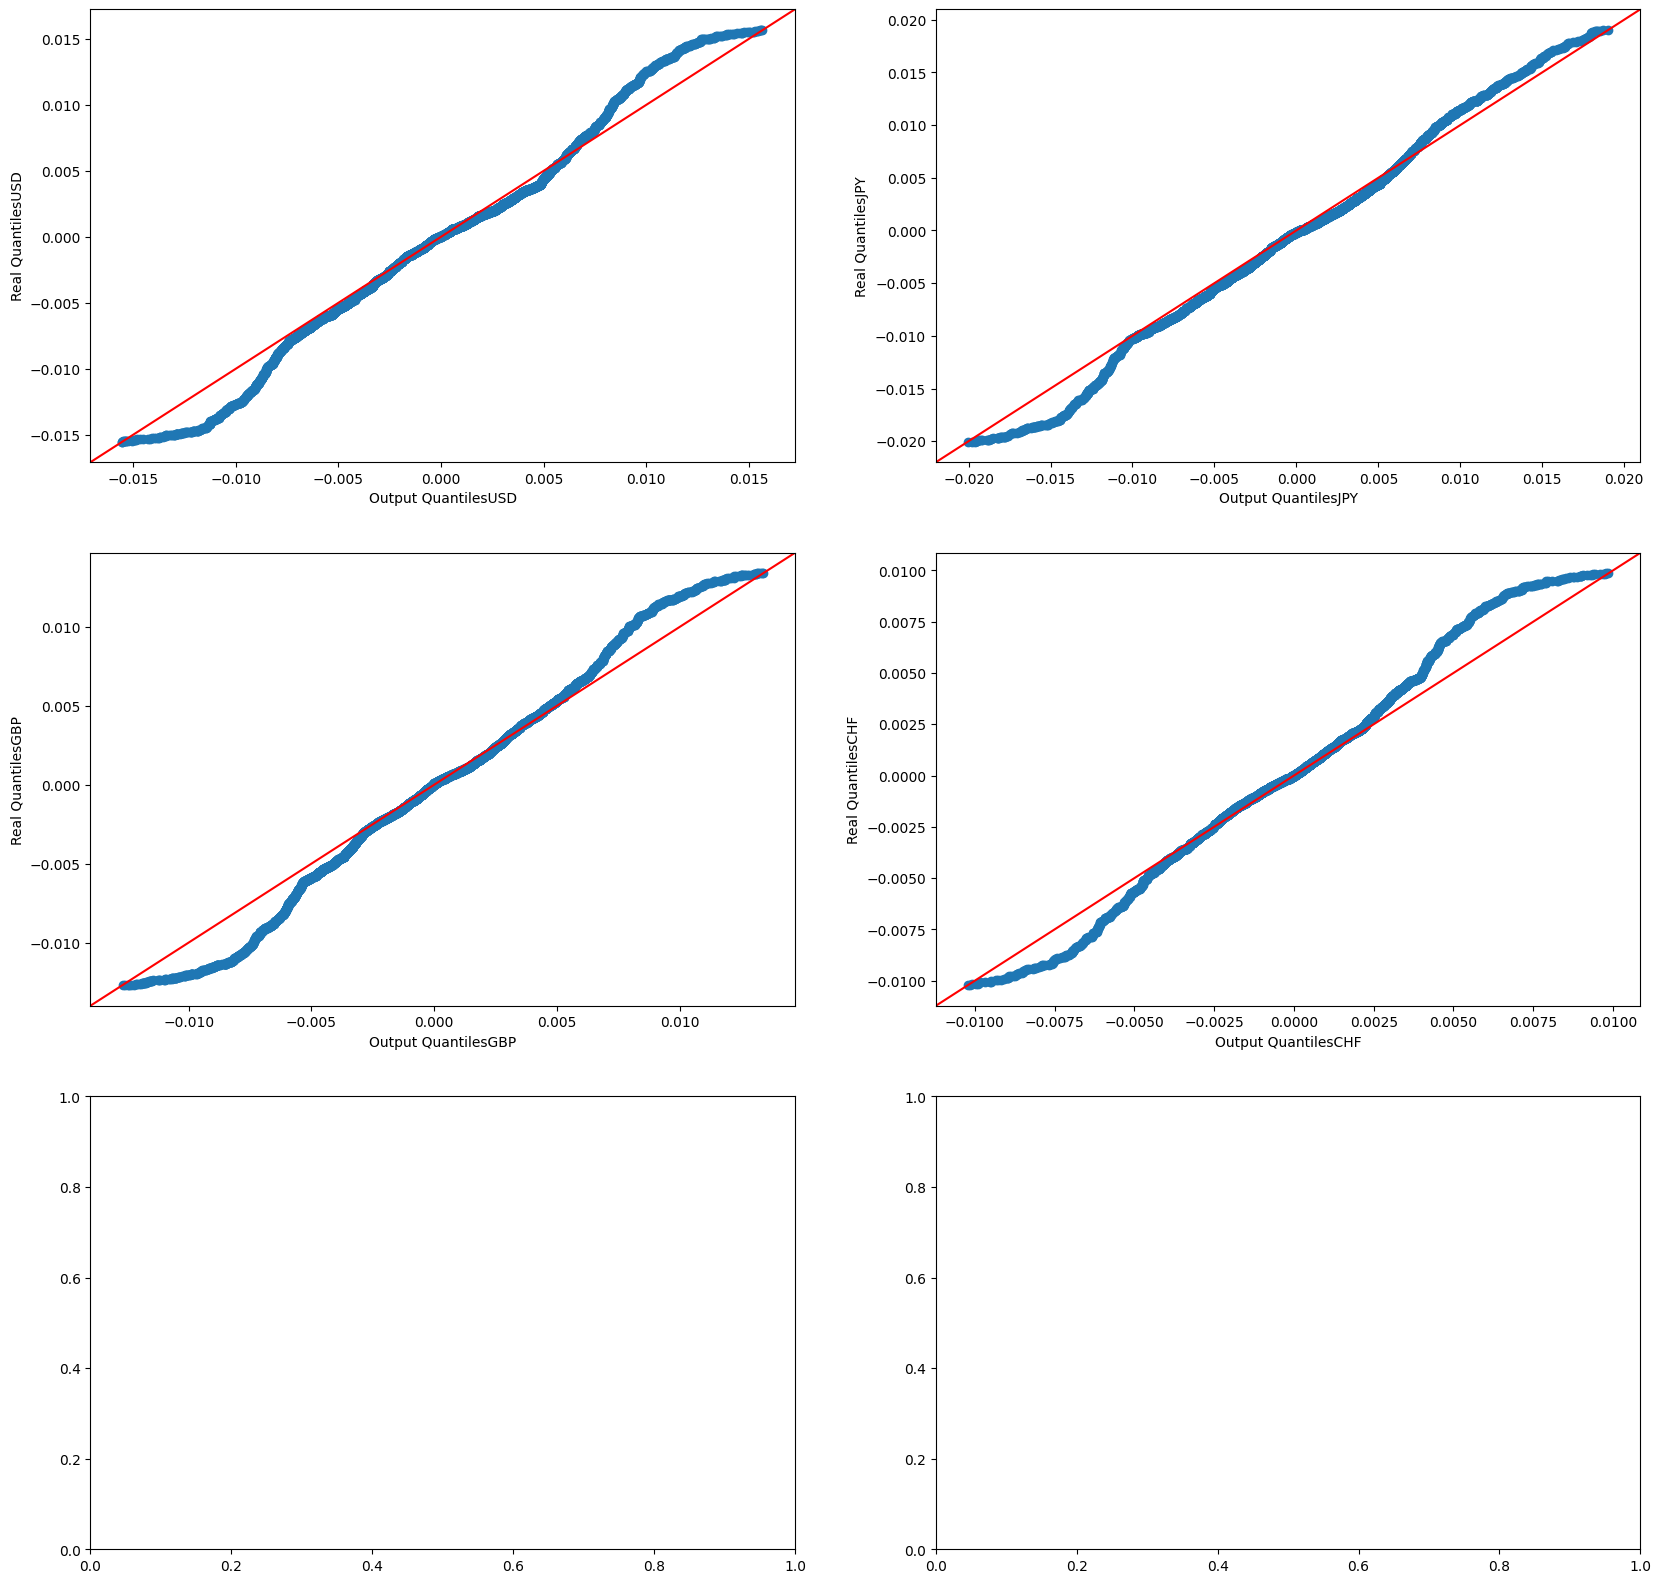

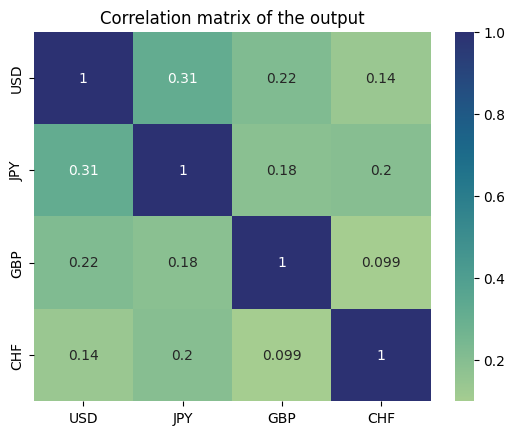

Correlation done
Train done


In [15]:
test_dates = '2021-09-04'
plot_from='2020-01-01'
scenarios = 10
epochs = 7000
lr = 0.015
windows = 5
K = 150
ts.rbm_esg(scenarios, epochs, lr, K, test_dates, plot_from, windows, parallel=True)